Please input the total width of graphene sheet Å = 30
Please input the total length of graphene sheet in Å = 30
Please input the chirality angle in degrees = 30
Please input orientation clockwise or anticlockwise (c or A) =A


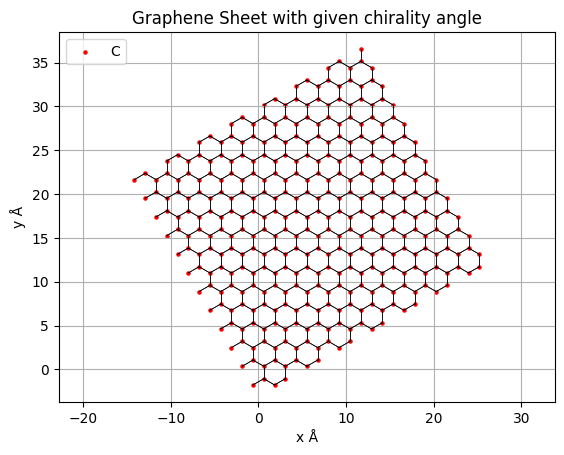

In [13]:
import math
import matplotlib.pyplot as plt

# Define the carbon-carbon bond length
bond_length = 1.42 # distance between C-C atmoms in graphene

# Take input from the user for required length and width of graphene sheet
width = float(input('Please input the total width of graphene sheet Å = ')) # Provide width in Angstrom
length = float(input('Please input the total length of graphene sheet in Å = ')) # Provide length in Angstrom unit
chirality_angle = float(input('Please input the chirality angle in degrees = ')) # Provide the chirality angle in degrees
orientation=str(input('Please input orientation clockwise or anticlockwise (c or A) =')) #Provide clockwise or anticlockwise angle 

# To calculate the number of carbon atoms along X and Y direction in sheet
nx = math.ceil(length / (3 * bond_length) * 4)
ny = math.ceil((width - bond_length * math.sqrt(3) / 2) / (bond_length * math.sqrt(3)))

# To generate the cordinate orientation of the carbon atoms in the graphene sheet in X and Y axis
x_cordinates = [0] * (nx*ny)
y_cordinates = [0] * (nx*ny)

x_cordinates_row = [0] * nx
y_cordinates_row = [0] * nx

for i in range(nx):
    if i % 2 == 0:
        x_cordinates_row[i] = (3*i-4)/4 * bond_length
    else:
        x_cordinates_row[i] = 3*(i-1)/4 * bond_length

    if i % 4 == 2 or i % 4 == 3:
        y_cordinates_row[i] = 0
    else:
        y_cordinates_row[i] = math.sqrt(3)/2 * bond_length

for i in range(ny):
    for j in range(nx):
        x_cordinates[i*nx + j] = x_cordinates_row[j]
        y_cordinates[i*nx + j] = y_cordinates_row[j] + (i-1) * math.sqrt(3) * bond_length

#
# Apply the chilarity angle and transformation of x and y cordinates
alpha = math.radians(chirality_angle)
for i in range(nx*ny):
    x = x_cordinates[i]
    y = y_cordinates[i]
    if orientation == 'A': #A= Anticlockwise or Counter clockwise direction
      x_cordinates[i] = x*math.cos(alpha) - y*math.sin(alpha) #cordinates are changed as per anti-clockwise direction
      y_cordinates[i] = x*math.sin(alpha) + y*math.cos(alpha)
    elif orientation == 'c': #C=   clockwise direction
      x_cordinates[i] = x*math.cos(alpha) + y*math.sin(alpha) #cordinates are changed as per clockwise direction
      y_cordinates[i] = -x*math.sin(alpha) + y*math.cos(alpha)
  


# Create a 2D scatter plot of the carbon atom positions
plt.scatter(x_cordinates, y_cordinates, s=5, facecolors='red', edgecolors='red')
plt.axis('equal')
plt.grid(True) 
plt.xlabel('x Å')
plt.ylabel('y Å')
plt.title('Graphene Sheet with given chirality angle')
plt.legend('C atoms',loc='upper left')

# Compute the distance between two points, and draw a line connecting the atoms if absolute difference in distance between bond length and two atom distance is less than 0.0001
def distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

for i in range(ny):
    for j in range(nx):
        for k in range(ny):
            for l in range(nx):
                if i != k or j != l:
                    dist = distance(x_cordinates[i*nx + j], y_cordinates[i*nx + j], x_cordinates[k*nx + l], y_cordinates[k*nx + l])
                    if abs(dist - bond_length) <= 0.0001:
                        plt.plot([x_cordinates[i*nx + j], x_cordinates[k*nx + l]], [y_cordinates[i*nx + j], y_cordinates[k*nx + l]], 'k-', linewidth=0.5)

# Write the coordinates to a .xyz file
with open('graphene_sheet_chiral.xyz', 'w') as fileID:
    fileID.write(str(nx*ny) + '\n')
    fileID.write('graphene_sheet\n')
